In [ ]:
#pip install healpy

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import healpy as hp

In [ ]:
NSIDE = 32
NPIX = hp.nside2npix(NSIDE)


0.0 180.0 -180.0 180.0


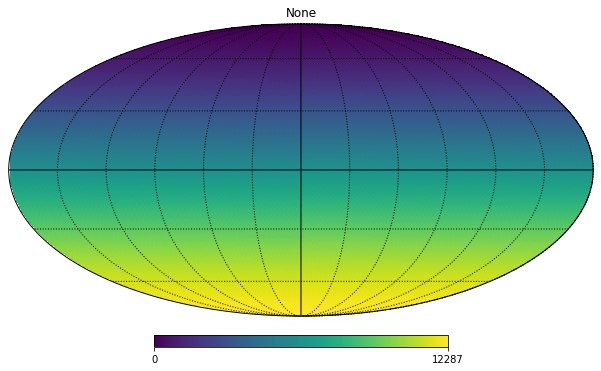

In [ ]:
m = np.arange(NPIX)
hp.mollview(m, title='None')
hp.graticule()

In [ ]:
vec = hp.ang2vec(np.pi / 2, np.pi  / 4)

In [ ]:
ipix_disc = hp.query_disc(nside=32, vec=vec, radius=np.radians(10))

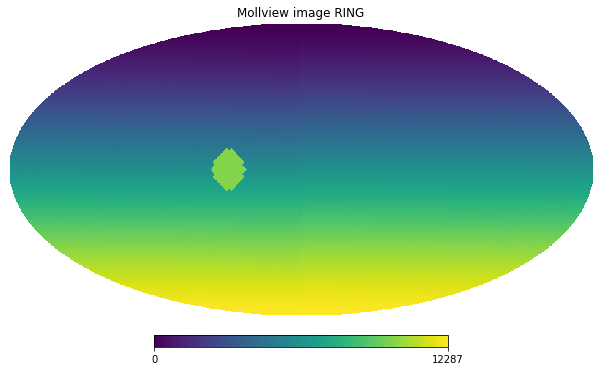

In [ ]:
m = np.arange(NPIX)
m[ipix_disc] = 10000
hp.mollview(m, title="Mollview image RING")

# ploting CMB power spectrum

In [ ]:
 cl=np.load('/content/drive/MyDrive/Colab Notebooks/zahra project/cl_planck_lensed.npy')

In [ ]:
ll = cl[ :,0]
cl = cl[ :,1]

In [ ]:
X=[]
Y=[]

x=ll
y=((ll)*(ll+1)*cl)/2*(np.pi)

for i in range(len(x)):
  if x[i]<3000:
    X.append(x[i])
    Y.append(y[i])


Text(0.5, 1.0, 'TT Cross Power Spectrum')

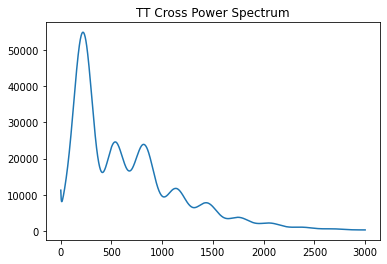

In [ ]:
plt.plot(X,Y)
plt.title('TT Cross Power Spectrum')

In [ ]:
hp.sphtfunc.synfast(cl,32)

array([ -28.1409113 ,  -80.48337175, -122.85896846, ...,  -34.08806313,
         51.29837225,   -3.75193223])

In [ ]:
a=hp.sphtfunc.synfast(cl, nside=1024)

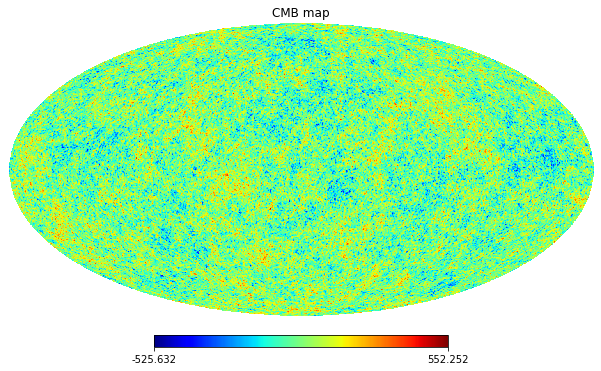

In [ ]:
hp.mollview(a , xsize=1500, title='CMB map',cmap='jet')


# **Masking:**

In [ ]:
mask = np.load('/content/drive/MyDrive/Colab Notebooks/zahra project/cl_planck_lensed.npy').astype(np.bool_)
#a[103]=hp.UNSEEN
map_masked = hp.ma(a)
map_masked.mask = np.logical_not(mask)

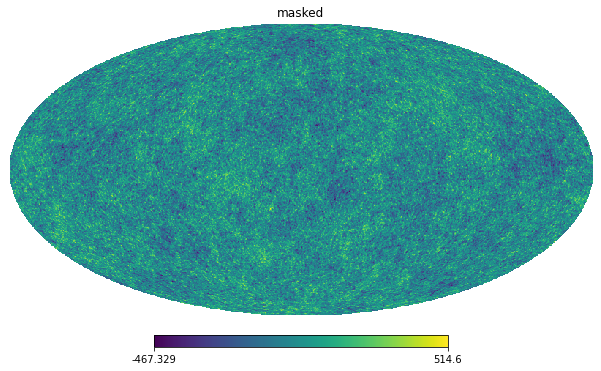

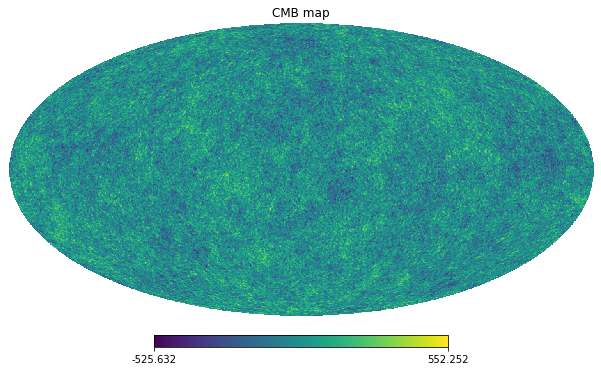

In [ ]:
hp.mollview(map_masked.filled(),title='masked')
hp.mollview(a , xsize=1500, title='CMB map')

In [ ]:
plt.hist(map_masked.compressed(), bins=1000)

# **WMAP data**

In [ ]:
pwd

'/content'

In [3]:
mv COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits /content/drive/MyDrive/Colab\Notebooks

mv: cannot stat 'COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits': No such file or directory


In [ ]:
#!wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits;wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits

In [ ]:
#wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")

In [ ]:
!wget -O COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits "http://pla.esac.esa.int/pla/aio/product-action?MAP.MAP_ID=COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits"


--2021-08-02 16:40:41--  http://pla.esac.esa.int/pla/aio/product-action?MAP.MAP_ID=COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits
Resolving pla.esac.esa.int (pla.esac.esa.int)... 193.147.153.153
Connecting to pla.esac.esa.int (pla.esac.esa.int)|193.147.153.153|:80... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [image/fits]
Saving to: ‘COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits’

COM_Mask_CMB-common     [   <=>              ] 192.01M  29.1MB/s    in 7.4s    

2021-08-02 16:40:49 (25.8 MB/s) - ‘COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits’ saved [201335040]

